# TimeSeries


For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
## Loading the data

data = pd.read_csv('footfalls.csv')

In [8]:
## Converting the data into time series

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

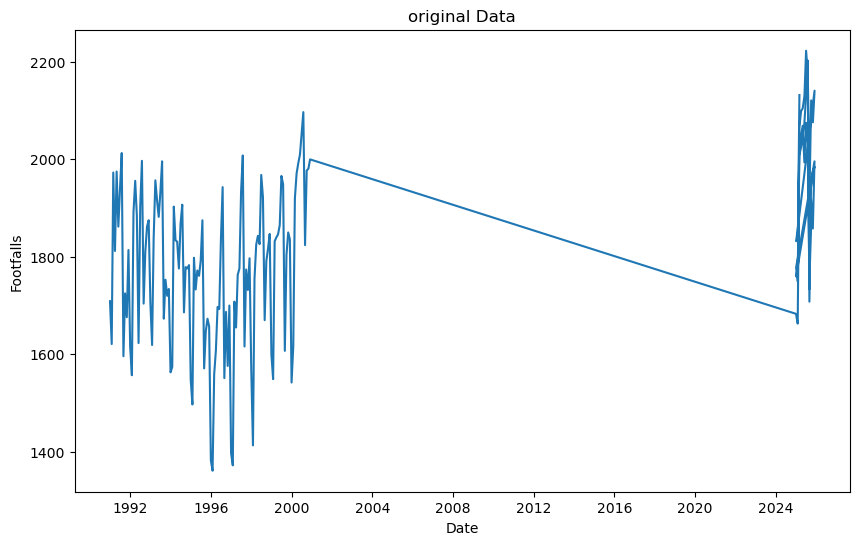

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data['Footfalls'])
plt.title('original Data')
plt.xlabel('Date')
plt.ylabel('Footfalls')
plt.show()

In [12]:
result = adfuller(data['Footfalls'])
print('Dickey-Fuller Test Results: ')
print('Test Statistic: ', result[0])
print('p-value:', result[1])
print('critical values:')
for key, value in result[4].items():
    print(key,value)

Dickey-Fuller Test Results: 
Test Statistic:  -0.23499112877866932
p-value: 0.9342202042969283
critical values:
1% -3.476597917537401
5% -2.8818291230495543
10% -2.5775887982253085


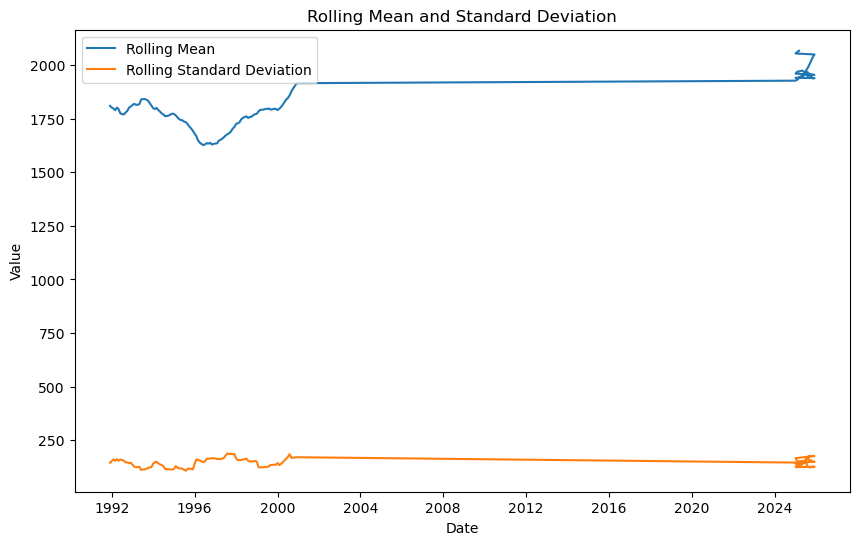

In [14]:
## Plotting rolling mean and standard deviation

plt.figure(figsize=(10,6))
plt.plot(data['Footfalls'].rolling(window=12).mean(), label='Rolling Mean')
plt.plot(data['Footfalls'].rolling(window=12).std(), label='Rolling Standard Deviation')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [16]:
## Training and testing data

train_data, test_data= train_test_split(data, test_size= 0.3, random_state=42, shuffle= False)

In [18]:
model = ARIMA(train_data['Footfalls'], order= (1,1,1)) 
model_fit= model.fit(method='statespace')

C:\Users\Namrata\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Namrata\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Namrata\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Namrata\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  111
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -701.908
Date:                Sun, 23 Mar 2025   AIC                           1409.816
Time:                        22:26:31   BIC                           1417.917
Sample:                    01-01-1991   HQIC                          1413.102
                         - 03-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3549      0.090      3.933      0.000       0.178       0.532
ma.L1         -0.9551      0.037    -25.845      0.000      -1.028      -0.883
sigma2      2.006e+04   3388.291      5.920      0.0

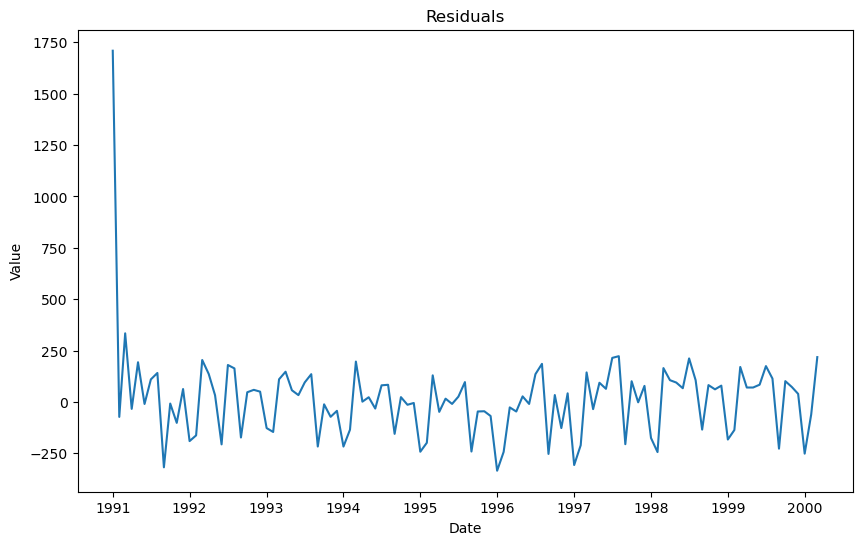

In [22]:
plt.figure(figsize=(10,6))
plt.plot(model_fit.resid)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

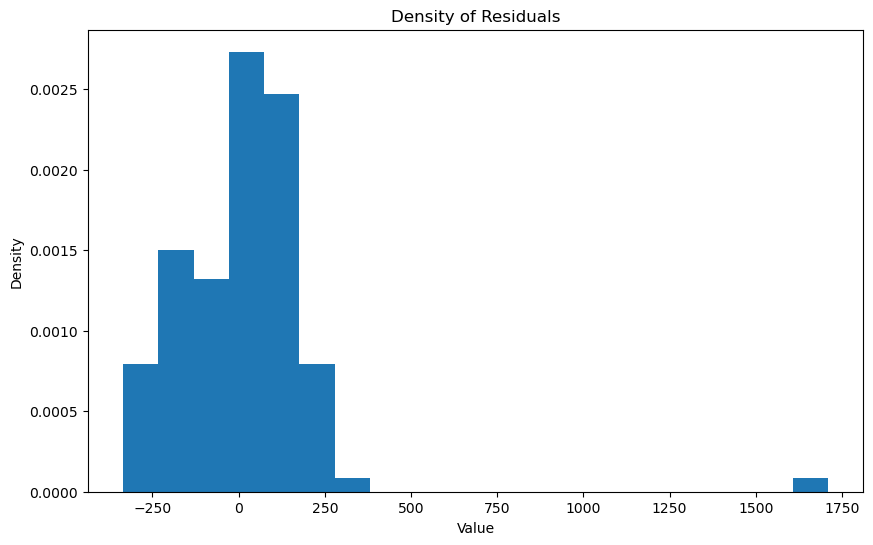

In [24]:
plt.figure(figsize=(10,6))
plt.hist(model_fit.resid, bins=20, density='True')
plt.title('Density of Residuals')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

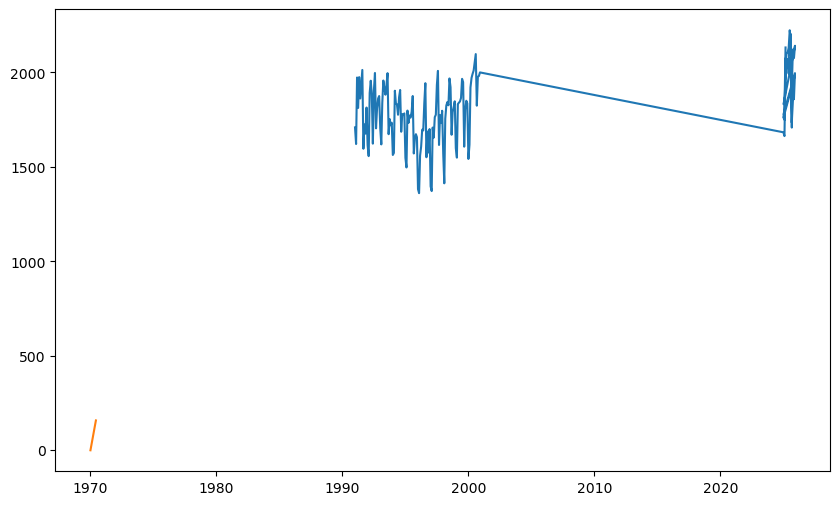

In [32]:
plt.figure(figsize=(10,6))
plt.plot(data['Footfalls'], label='Actual')
plt.plot(np.arange(len(data), ))

In [28]:
forecast = model_fit.forecast(steps=10)

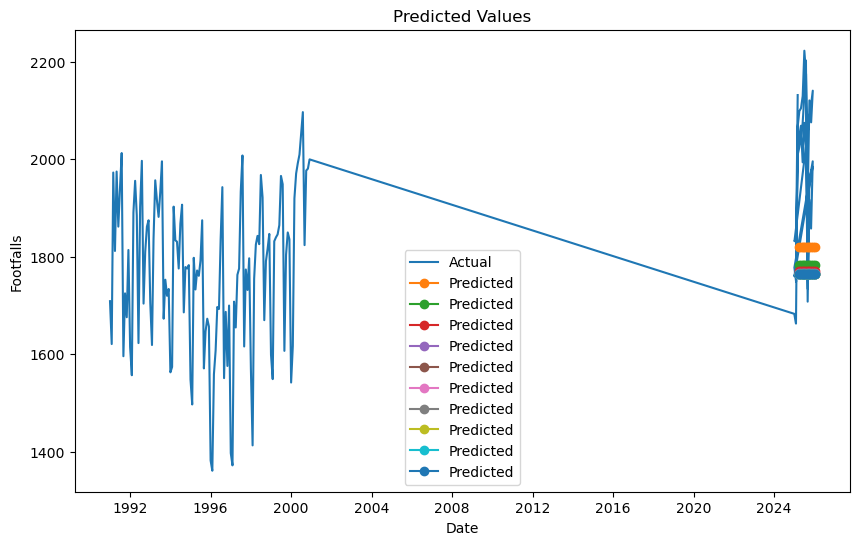

In [36]:
plt.figure(figsize=(10,6))
plt.plot(data['Footfalls'], label = 'Actual')
plt.plot([data.index[-1]+ pd.DateOffset(months=i) for i in range(1,11)], [forecast]*10, label='Predicted', marker='o')
plt.title('Predicted Values')
plt.xlabel('Date')
plt.ylabel('Footfalls')
plt.legend()
plt.show()